# Diffusion

This notebook illustrates the ranking of the nodes of a graph by [diffusion](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#diffusion).

In [2]:
%matplotlib inline
import networkx as nx
import numpy as np
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Ranking**

In [5]:
diffusion = skn.ranking.Diffusion()
diffusion.fit(adjacency, {1: 0, 2: 1})

Diffusion(solver='lsqr')

In [6]:
score = diffusion.score_

**Visualization**

In [7]:
graph = nx.from_scipy_sparse_matrix(adjacency)
pos = nx.spring_layout(graph)

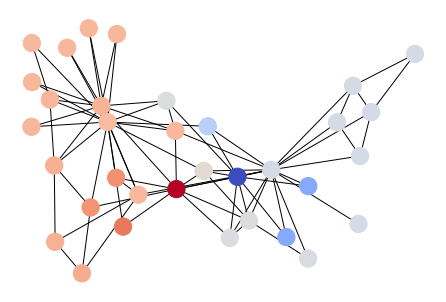

In [8]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=score, cmap='coolwarm')

**Parameters**

In [9]:
# Personalization as vector (only non-zeros entries are taken into account)
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[1] = -1
personalization[2] = 1
diffusion.fit(adjacency, personalization)
score = diffusion.score_

## Directed graphs

**Loading**

In [10]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Ranking**

In [11]:
picasso = 0
monet = 1

In [12]:
diffusion.fit(adjacency, {picasso: -1, monet: 1})

Diffusion(solver='lsqr')

In [13]:
score = diffusion.score_

**Visualization**

In [14]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())
pos = nx.spring_layout(graph)

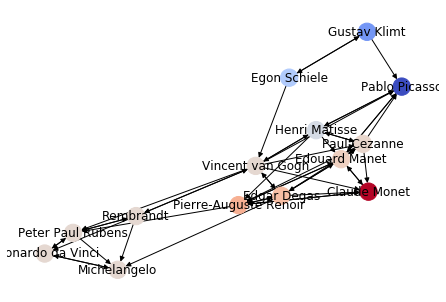

In [15]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=score, cmap='coolwarm', labels=names)

## Bipartite graphs

**Loading**

In [16]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Ranking**

In [17]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [18]:
drive = 3
aviator = 9

In [19]:
diffusion.fit(adjacency, personalization={drive: -1, aviator: 1})

Diffusion(solver='lsqr')

In [20]:
score = diffusion.score_

**Visualization**

In [21]:
graph = nx.from_scipy_sparse_matrix(adjacency)
n1, n2 = biadjacency.shape
pos = {i: (0, i) for i in range(n1)}
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)}
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [22]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

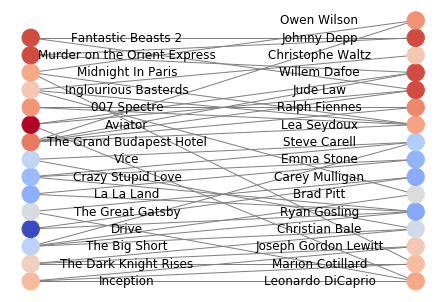

In [23]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos=pos, edge_color='grey', node_color=score, cmap='coolwarm')
show_labels = nx.draw_networkx_labels(graph, pos_labels, labels=names)